# MNIST

In [1]:
import csv
import numpy as np

def load_data(filepath, delimiter=",", dtype=float):
    """Load a numerical numpy array from a file."""

    print(f"Loading {filepath}...")
    with open(filepath, "r") as f:
        data_iterator = csv.reader(f, delimiter=delimiter)
        data_list = list(data_iterator)
    data = np.asarray(data_list, dtype=dtype)
    y = data[:, 0].reshape(-1, 1)
    x = data[:, 1:]
    print("Done.")
    return x, y

## 1. Dataset load

### 1-1. Using CSV dataset

In [95]:
TRAIN_FILE = "./datasets/MNIST/data_train.csv"
TEST_FILE =  "./datasets/MNIST/data_test.csv"

# train_data = load_data(TRAIN_FILE, ',', int)
# test_data = load_data(TEST_FILE, ',', int)

x_train, y_train = load_data(TRAIN_FILE, ',', int)
x_test, y_test = load_data(TEST_FILE, ',', int)

Loading ./datasets/MNIST/data_train.csv...
Done.
Loading ./datasets/MNIST/data_test.csv...
Done.


In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x train shape:", x_train.shape, x_train.dtype)
print("y train shape:", y_train.shape, y_train.dtype)
print("x test shape:", x_test.shape, x_test.dtype)
print("y test shape:", y_test.shape, y_test.dtype)

x train shape: (60000, 784) float64
y train shape: (60000, 1) uint8
x test shape: (10000, 784) float64
y test shape: (10000, 1) uint8


In [3]:
train_data = np.hstack((y_train, x_train))
print(train_data.shape)
test_data = np.hstack((y_test, x_test))
print(test_data.shape)

(60000, 785)
(10000, 785)


### 1-2. Using keras

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

print("x train shape:", x_train.shape, x_train.dtype)
print("y train shape:", y_train.shape, y_train.dtype)
print("x test shape:", x_test.shape, x_test.dtype)
print("y test shape:", y_test.shape, y_test.dtype)

2024-05-30 19:00:43.840081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


x train shape: (60000, 784) float64
y train shape: (60000, 1) uint8
x test shape: (10000, 784) float64
y test shape: (10000, 1) uint8


In [4]:
train_data1 = np.hstack((y_train, x_train))
print(train_data1.shape)
test_data1 = np.hstack((y_test, x_test))
print(test_data1.shape)

(60000, 785)
(10000, 785)


In [5]:
t = train_data1 == train_data
print(t.all())

t = test_data1 == test_data
print(t.all())

True
True


In [6]:
data = train_data

for row in range(28):
    if not sum(data[0, 28 * row: 28 * (row + 1)]):
        continue
    for col in range(28):
        idx = row * 28 + col
        print("#" if data[0, 1+idx] else " ", end="")
    print()

                            
            ############    
        ################    
       ################     
       ###########          
        ####### ##          
         #####              
           ####             
           ####             
            ######          
             ######         
              ######        
               #####        
                 ####       
              #######       
            ########        
          #########         
        ##########          
      ##########            
    ##########              
    ########                


Import source files

In [7]:
from nn.nn1 import NeuralNet, Layer
from srcs.activations import LeakyReLU, Sigmoid, Softmax
from srcs.losses import MSELoss, CrossEntropyLoss, BCELoss
import matplotlib.pyplot as plt

In [8]:
import nn.nn_generic as nn

In [9]:
def to_col(x):
    return x.reshape((x.size, 1))

def test(net, test_data):
    correct = 0
    for i, test_row in enumerate(test_data):

        y = test_row[0]
        x = to_col(test_row[1:])
        out = net.forward(x)
        y_pred = np.argmax(out)
        # if not i % 3000:
        #     print('pred:', y_pred, 'true:', y)
        if y == y_pred:
            correct += 1

    return correct/test_data.shape[0]

## 2. Train the network

In [10]:
input_shape = x_train.shape[1]
output_shape = len(np.unique(y_train))

print("input shape:", input_shape)
print("output shape:", output_shape)

input shape: 784
output shape: 10


### 2-1. LeakyRelu

In [11]:
def train(net, train_data, epochs=10):
    x_train = train_data[:30000, 1:].T
    y_train = train_data[:30000, 0:1].T

    # print(train_data.shape)
    print("x_train.shape", x_train.shape)
    print("y_train.shape", y_train.shape)
    loss = net._loss_function
    train_loss = []

    for epoch in range(epochs):
        net.fit2(x_train, y_train)
        # if epoch % 10 == 0:
        print(epoch)
        train_loss.append(loss.loss(net.forward(x_train), y_train))
        # y_pred = net.forward(x_train)#.reshape(1, -1)
        # print(y_pred, y_pred.shape)
        # print(y_pred.shape, y_train.flatten().shape)
        # print(y_train, y_train.shape)
        # train_loss.append(loss.loss(y_pred, y_train))

    '''
    for i, train_row in enumerate(train_data):
        # if not i%1000:
        #     print(i)
        x = to_col(train_row[1:])
        y = np.array(train_row[0], ndmin=2)
        # if not i%10000:
        #     print('y:', y)
        # print(y, y.shape)
        net.train(x, y)
        if i % 10 == 0:
            train_loss.append(loss(net.forward(x), y))
    '''

    plt.plot(train_loss)
    plt.show()

    return train_loss

In [12]:
x_train = train_data[:30000, 1:].T
y_train = train_data[:30000, 0:1].T

In [13]:
def initialize_weights(outs, ins):
    return np.random.default_rng().normal(loc=0, scale=1/(outs * ins), size=(outs, ins))
    # return np.zeros((outs, ins))

def initialize_bias(outs):
    """create a column vector as a matrix"""
    # return np.zeros((outs, 1))
    return initialize_weights(outs, 1)

In [14]:
class Layer:
    """
    Layer class that represents the connections and the flow of information between a column of neurons and the next.
    It deals with what happens in between two columns of neurons instead of having the layer specifially represent the neurons of each vertical column
    """
    def __init__(self, ins, outs, act_function) -> None:
        self.ins = ins
        self.outs = outs
        self.a = None
        self.dz = None
        self.act_function = act_function

        self._W = initialize_weights(self.outs, self.ins)
        self._b = initialize_bias(self.outs)

    def forward(self, x):
        """
        helper method that computes the forward pass in the layer

        Parameters:
        x: a set of neuron states

        Returns:
        the next set of neuron states
        """
        a = self.act_function.f(np.dot(self._W, x) + self._b)
        self.a = a
        return  a

In [15]:
class NeuralNet:
    """
    A series of layers connected and compatible.
    """
    def __init__(self, layers, loss_function, lr) -> None:
        self._layers = layers
        self._loss_function = loss_function
        self.lr = lr
        self.activations = []
        self.check_layer_compatibility()

    def check_layer_compatibility(self):
        for from_, to_ in zip(self._layers[:-1], self._layers[1:]):
            print("from, to:", from_.ins, to_.ins)
            if from_.outs != to_.ins:
                raise ValueError("Layers should have compatible shapes.")
    
    def print_parameter_shape(self):
        for i, layer in enumerate(self._layers):
            print(f"W{i} ", layer._W.shape)
            print(f"b{i} ", layer._b.shape)

    def forward(self, x):
        # xs = [x]
        # for layer in self._layers:
        #     xs.append(layer.forward(xs[-1]))
        # return xs
        out = x
        self.activations.append(x)
        n_layers = len(self._layers)
        for layer in self._layers:
        # for l in range(n_layers):
            out = layer.forward(out)
            # out = self._layers[l].forward(self.activations[l - 1])
            self.activations.append(out)
        return out

    def predict(self, x):
        a = self.forward(x)
        # return (a >= 0.5).astype(int)
        return np.argmax(a, axis=0)

    def loss(self, y, y_pred):
        return self._loss_function.loss(y, y_pred)

    def backward(self, y):
        # dz = self._layers[-1].a - y
        dz = self.activations[-1] - y

        # for i in range(len(self.activations)):
            # print(f"A{i}.shape: ", self.activations[i].shape)
        m = y.shape[1]
        n_layers = len(self._layers)
        # print("n_layers:", n_layers)
        # for i, layer in enumerate(reversed(self._layers)):
        for l in reversed(range(0, n_layers)):
            # layer_num = n_layers - i - 2
            # print("layer num:", l)
            # a = self._layers[l - 1].a
            a = self.activations[l]
            # print(f"{l}th a.shape: ", a.shape)

            # Compute the derivatives
            # print(i)
            dW = 1 / m * np.dot(dz, a.T)
            db = 1 / m * np.sum(dz, axis=1, keepdims=True)
            if l > 0: 
                dz = np.dot(self._layers[l]._W.T, dz) * a * (1 - a)

            # print("dW.shape: ", dW.shape)
            # print("W.shape: ", self._layers[l]._W.shape)
            # Update parameters
            self._layers[l]._W -= self.lr * dW
            self._layers[l]._b -= self.lr * db

    def update(self):
        pass

    def backward2(self, a, y):
        dz = a.pop() - y
        m = y.shape[1]
        n_layers = len(self._layers)
        # print("m examples:", m)
        for i, (layer, a) in enumerate(zip(self._layers[::-1], a[::-1])):

            # Compute the derivatives
            # print(i)
            dW = 1 / m * np.dot(dz, a.T)
            db = 1 / m * np.sum(dz, axis=1, keepdims=True)
            if i < n_layers: 
                dz = np.dot(layer._W.T, dz) * a * (1 - a)

            # Update parameters
            layer._W -= self.lr * dW
            layer._b -= self.lr * db

    
    def fit(self, x_train, y_train, epochs=10):
        # x_train = train_data[:30000, 1:].T
        # y_train = train_data[:30000, 0:1].T

        # print(train_data.shape)
        print("x_train.shape", x_train.shape)
        print("y_train.shape", y_train.shape)
        train_loss = []

        for epoch in range(epochs):
            # self.fit(x_train, y_train)
            self.forward(x_train)
            self.backward(y_train)
            # if epoch % 10 == 0:
            print(epoch)
            train_loss.append(self._loss_function.compute_loss(self.forward(x_train), y_train))
            # y_pred = net.forward(x_train)#.reshape(1, -1)
            # print(y_pred, y_pred.shape)
            # print(y_pred.shape, y_train.flatten().shape)
            # print(y_train, y_train.shape)
            # train_loss.append(loss.loss(y_pred, y_train))

        '''
        for i, train_row in enumerate(train_data):
            # if not i%1000:
            #     print(i)
            x = to_col(train_row[1:])
            y = np.array(train_row[0], ndmin=2)
            # if not i%10000:
            #     print('y:', y)
            # print(y, y.shape)
            net.train(x, y)
            if i % 10 == 0:
                train_loss.append(loss(net.forward(x), y))
        '''

        return train_loss

    def fit2(self, x, y):
        """
        Train the network on input x and expected output y.
        """
        # activations during forward pass
        a = [x]
        for layer in self._layers:
            a.append(layer.forward(a[-1]))

        # backpropagation
        self.backward2(a, y)

#### 2-1-1. LeakyRelu + MSELoss

In [16]:
layers = [
    Layer(input_shape, 20, LeakyReLU()),
    Layer(20, 16, LeakyReLU()),
    Layer(16, output_shape, LeakyReLU()),
]
net = NeuralNet(layers, MSELoss(), 0.01)
net.print_parameter_shape()

# train(net, train_data)
net.fit(x_train, y_train)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

from, to: 784 20
from, to: 20 16
W0  (20, 784)
b0  (20, 1)
W1  (16, 20)
b1  (16, 1)
W2  (10, 16)
b2  (10, 1)
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9
Accuracy is 10.10%


#### 2-1-2. LeakyRelu + BCELoss

In [127]:
# Use BCELoss
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, LeakyReLU()),
]
net = NeuralNet(layers, BCELoss(), 0.01)

# train_loss = train(net, train_data)
net.fit(x_train, y_train)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)


ValueError: operands could not be broadcast together with shapes (16,16) (10,16) (16,16) 

In [120]:
y_pred = 0.2
y = 0
eps=1e-15

y_pred = np.clip(y_pred, eps, 1 - eps)
loss = - np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
loss
train_loss

NameError: name 'train_loss' is not defined

#### 2-1-3. LeakyRelu + CrossEntropyLoss

In [125]:
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, LeakyReLU()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.001)

# train_loss = train(net, train_data)
train_loss = net.fit(x_train, y_train)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0


AttributeError: 'CrossEntropyLoss' object has no attribute 'compute_loss'

In [123]:
train_loss

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

### 2-2. Sigmoid

In [ ]:
def train(net, train_data):
    # Precompute all target vectors.
    ys = {}
    for y in range(10):
        yv = np.zeros((10, 1))
        yv[t] = 1
        ys[t] = yv

    for i, train_row in enumerate(train_data):
        if not i%10000:
            print(i)

        y = ys[train_row[0]] # one-hot vector
        x = to_col(train_row[1:])
        net.train(x, y)

#### 2-2-1. Sigmoid + MSELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


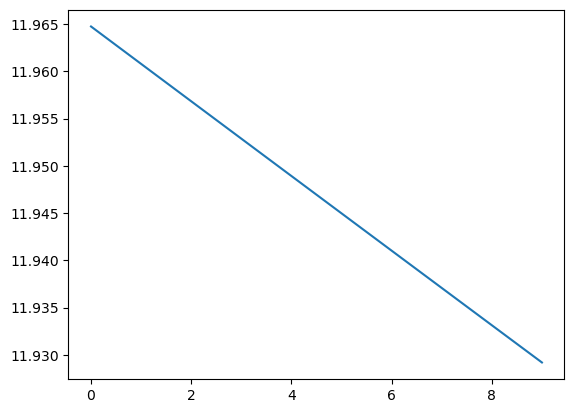

Accuracy is 10.28%


In [ ]:
# Use a Sigmoid as the final layer
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, MSELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-2-2. Sigmoid + BCELoss

In [104]:
# sigmoid at the end and the BCELoss
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, BCELoss(), 0.001)

# train(net, train_data)
net.fit(x_train, y_train)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9
Accuracy is 8.92%


#### 2-2-3. Sigmoid + CrossEntropyLoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


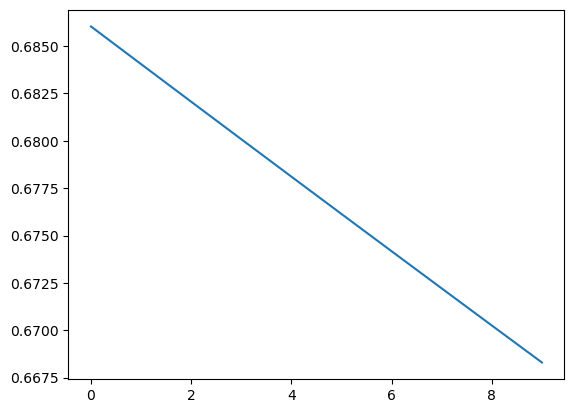

Accuracy is 8.92%


In [42]:
# sigmoid at the end and the CrossEntropyLoss
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Sigmoid()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

### 2-3. Softmax

In [58]:
def train(net, train_data):
    for i, train_row in enumerate(train_data):
        t = train_row[0]  # Assume the first element is the class label
        x = to_col(train_row[1:])  # Assume the rest are input features
        
        # Convert the class label to one-hot encoding
        t_one_hot = np.zeros((10, 1))  # net.output_size is the number of classes
        t_one_hot[t] = 1

        # Train the network
        # print("x in train:", x.shape)
        net.train(x, t_one_hot)

#### 2-3-1. Softmax + MSELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


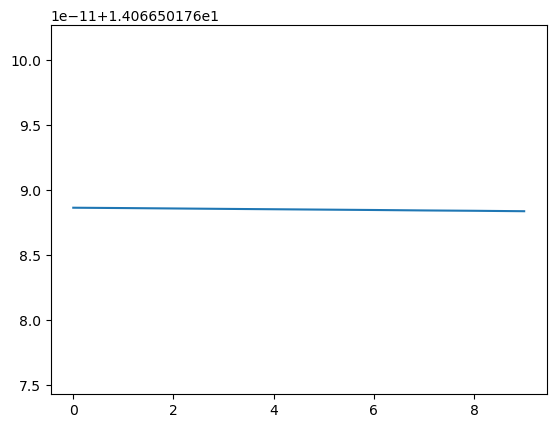

Accuracy is 9.80%


In [43]:
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, MSELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-3-2. Softmax + BCELoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9


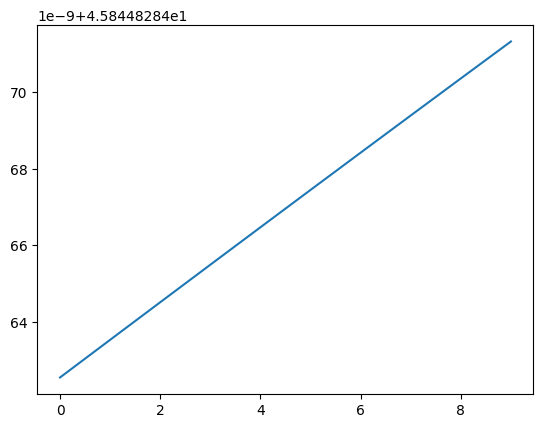

Accuracy is 9.80%


In [105]:
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, BCELoss(), 0.001)

train(net, train_data)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

#### 2-3-3. Softmax + CrossEntropyLoss

from, to: 784 16
from, to: 16 16
x_train.shape (784, 30000)
y_train.shape (1, 30000)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


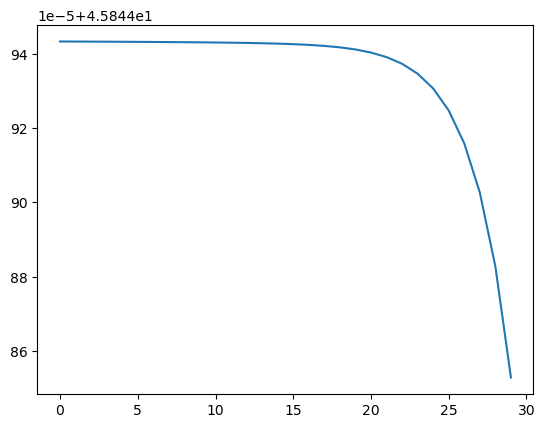

Accuracy is 9.80%


In [59]:
layers = [
    Layer(input_shape, 16, LeakyReLU()),
    Layer(16, 16, LeakyReLU()),
    Layer(16, output_shape, Softmax()),
]
net = NeuralNet(layers, CrossEntropyLoss(), 0.01)

train_loss = train(net, train_data, 30)

accuracy = test(net, test_data)
print(f"Accuracy is {100*accuracy:.2f}%")

In [ ]:
train_loss

100%|██████████| 10/10 [00:02<00:00,  4.64it/s]


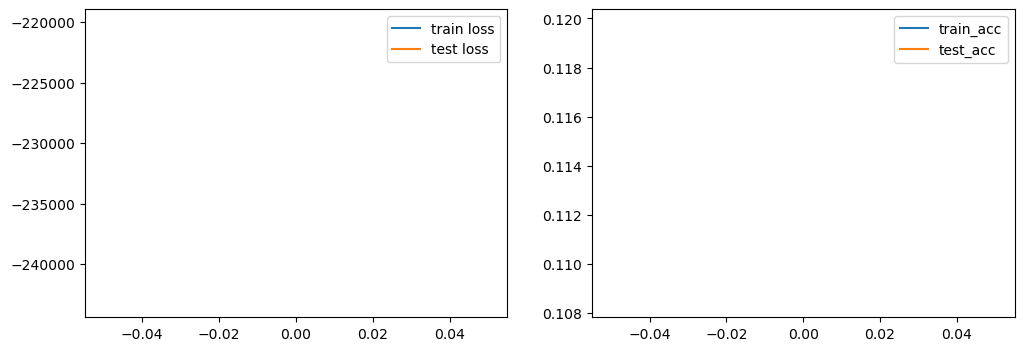

In [16]:

x_train = train_data[:30000, 1:].T
y_train = train_data[:30000, 0:1].T
parameters, train_loss, train_acc = nn.nn(x_train, y_train, hidden_layers=(16, 16), lr=0.03, epochs=10, plot_graph=True)

In [17]:
for k, v in parameters.items():
    print(k, v.shape)

W1 (16, 784)
b1 (16, 1)
W2 (16, 16)
b2 (16, 1)
W3 (1, 16)
b3 (1, 1)
